Visualização inicial dos dados:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons 

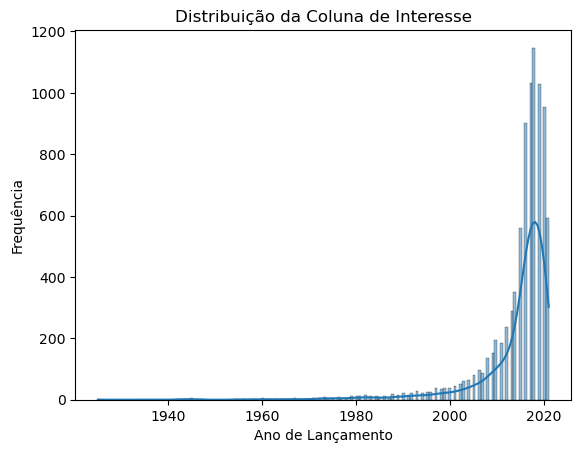

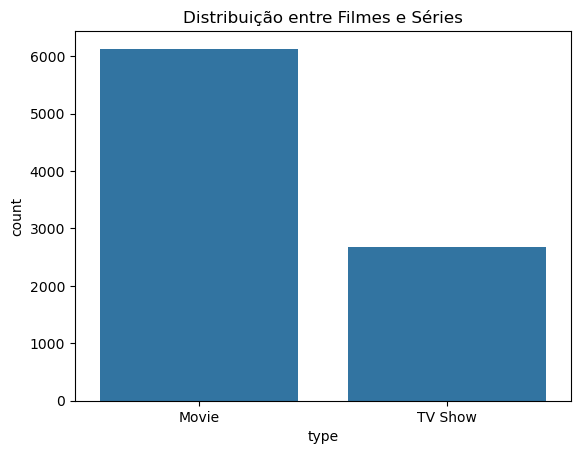

Quantidade de cada tipo de conteúdo:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


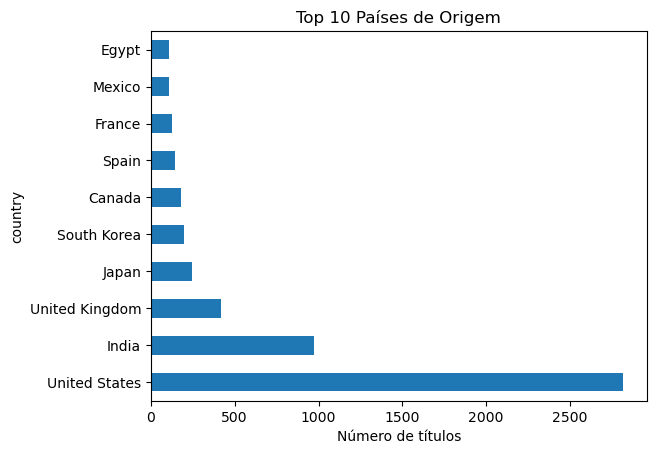

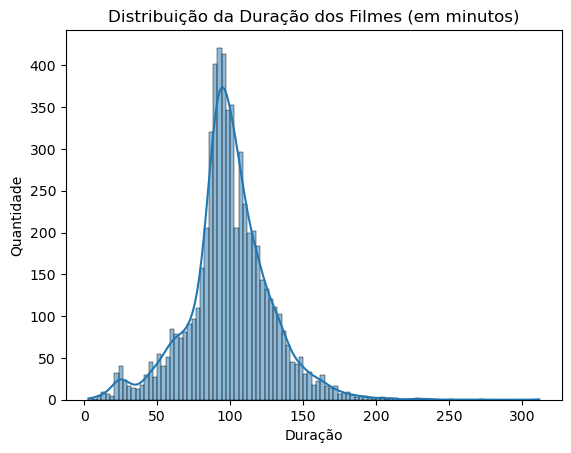

In [2]:
import pandas as pd                # Para manipulação de dados
import matplotlib.pyplot as plt    # Para criação de gráficos
import seaborn as sns              # Para gráficos estatísticos mais elaborados

# Carregando a base de dados
df = pd.read_csv('netflix_titles.csv')

# Exibindo as primeiras 5 linhas do DataFrame para entender a estrutura dos dados
print("Visualização inicial dos dados:")
print(df.head())

# Informações gerais sobre o DataFrame (tipos de dados, valores nulos, etc.)
print("\nInformações do DataFrame:")
print(df.info())

# Estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas:")
print(df.describe())

# Verificando valores ausentes (nulos) por coluna
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Histograma com curva de densidade (KDE)
sns.histplot(df['release_year'], kde=True)
plt.title("Distribuição da Coluna de Interesse")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Frequência")
plt.show()

# Gráfico de distribuição de filmes e séries
sns.countplot(x='type', data=df)
plt.title("Distribuição entre Filmes e Séries")
plt.show()

contagem = df['type'].value_counts()
print("Quantidade de cada tipo de conteúdo:")
print(contagem)

# Gráfico dos top 10 Países de origem
df['country'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Países de Origem")
plt.xlabel("Número de títulos")
plt.show()

# Cria uma nova coluna apenas para filmes com duração em minutos
df_filmes = df[df['type'] == 'Movie'].copy()
df_filmes['duration_min'] = df_filmes['duration'].str.extract(r'(\d+)').astype(float)

# Histograma da duração dos filmes em minutos
sns.histplot(df_filmes['duration_min'].dropna(), kde=True)
plt.title("Distribuição da Duração dos Filmes (em minutos)")
plt.xlabel("Duração")
plt.ylabel("Quantidade")
plt.show()

# Contagem de filmes lançados por ano
movies = df[df['type'] == 'Movie'] 
rel_year = movies.groupby('release_year').size().reset_index(name='movies_per_year')

# Gráfico de filmes lançados por ano
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=rel_year,
    x='release_year',
    y='movies_per_year',
    palette='viridis'
)

plt.title('Quantidade de filmes lançados por ano', fontsize=16)
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de filmes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Contagem de séries lançados por ano
tv_show = df[df['type'] == 'TV Show'] 
tvshow_rel_year = tv_show.groupby('release_year').size().reset_index(name='tv_show_per_year')

# Gráfico de TV Show lançados por ano
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=tvshow_rel_year,
    x='release_year',
    y='tv_show_per_year',
    palette='viridis'
)

plt.title('Quantidade de séries lançdas por ano', fontsize=16)
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de séries')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()